In [5]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

In [6]:
def f(t, A1=0.3, A2=23.8, A3=1.59, tau1=3.9, tau2=1.13, tau3=22.20, tau4=0.251):
    """Computes the value of the function f(t) that represents a photon with given parameters, only for t >= 0."""
    t = np.maximum(t, 0)  # Ensures that there are no negative time offsets
    term1 = A1 * (1 - np.exp(-t / tau1))
    term2 = A2 * np.exp(-t / tau2)
    term3 = A3 * np.exp(-t / tau3)
    term4 = np.exp(-t / tau4)
    return term1 * (term2 + term3 + term4)

def generate_offsets(n, rate=1):
    """Generate n random offsets using an exponential distribution with a given rate."""
    return np.random.exponential(scale=1/rate, size=n)


In [7]:
def export_data(t_values, summed_values, n_photons):
    filename = f"photon_data_{n_photons}_photons.txt"
    with open(filename, 'w') as file:
        for t, value in zip(t_values, summed_values):
            file.write(f"{t}, {value}\n")  # Comma-separated values. Change to "\t" for tab-separated.

def simulate_photon_data(n_photons):
    lambda_rate = 0.1  # Rate parameter for the exponential distribution
    random_offsets = generate_offsets(n_photons, rate=lambda_rate)
    t_values = np.linspace(0, 150, 1500)
    summed_values = np.zeros_like(t_values)

    # Parameters sampled from normal distributions
    A1 = norm.rvs(loc=0.3, scale=0.01)  # Mean = 0.3, SD = 0.01
    A2 = norm.rvs(loc=23.8, scale=0.2)  # Mean = 23.8, SD = 0.2
    A3 = norm.rvs(loc=1.59, scale=0.01) # Mean = 1.59, SD = 0.01
    tau1 = norm.rvs(loc=3.9, scale=0.2)  # Mean = 3.9, SD = 0.2
    tau2 = norm.rvs(loc=1.13, scale=0.02) # Mean = 1.13, SD = 0.02
    tau3 = norm.rvs(loc=22.20, scale=0.4) # Mean = 22.20, SD = 0.4
    tau4 = norm.rvs(loc=0.251, scale=0.005) # Mean = 0.251, SD = 0.005

    plt.figure(figsize=(10, 6))

    for offset in random_offsets:
        individual_values = f(t_values - offset, A1, A2, A3, tau1, tau2, tau3, tau4)
        plt.plot(t_values, individual_values, color='gray', alpha=0.3)  # Plot each individual photon signal
        summed_values += individual_values

    # Plot the resulting summed function
    plt.plot(t_values, summed_values, color='red', label='Output Signal', linewidth=2)
    plt.title(f'Plot of {n_photons} Individual Photons and Output Signal of Summed Photons')
    plt.xlabel('Time (ns)')
    plt.ylabel('Amplitude (mv)')
    plt.grid(True)
    plt.legend()
    plt.show()

    # Export the data after showing the plot
    export_data(t_values, summed_values, n_photons)

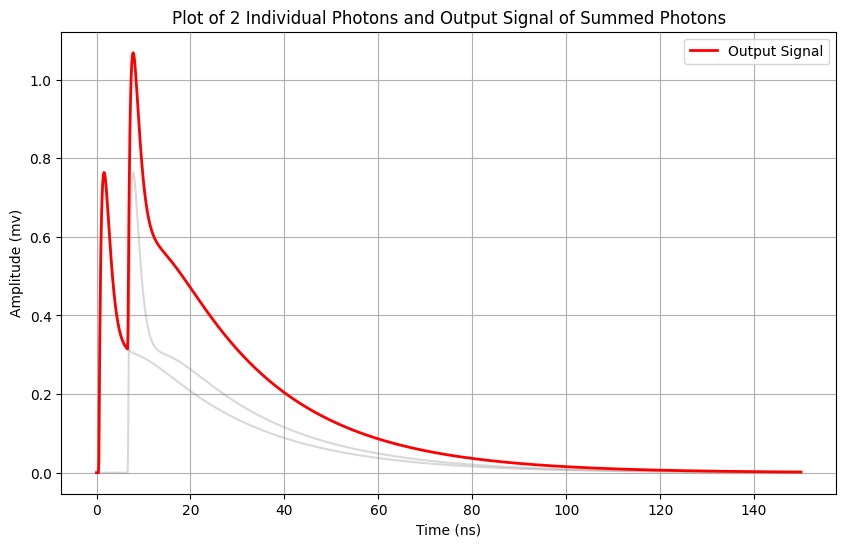

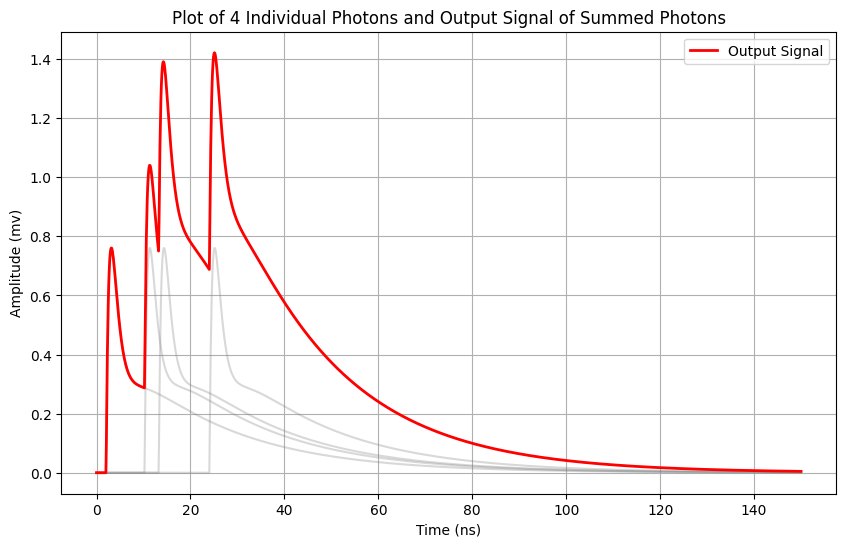

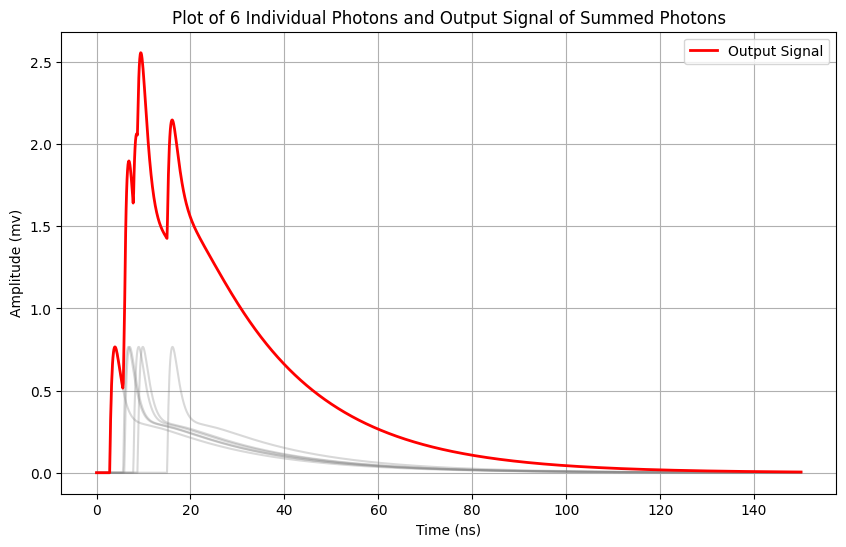

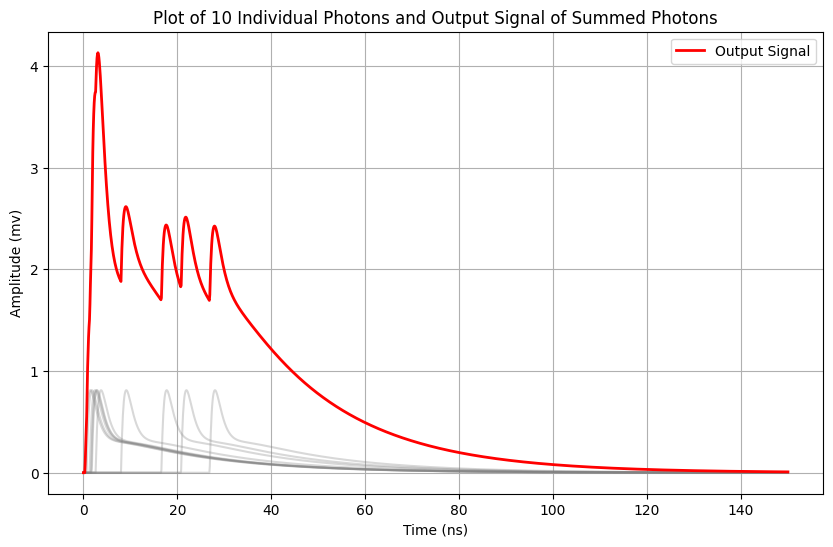

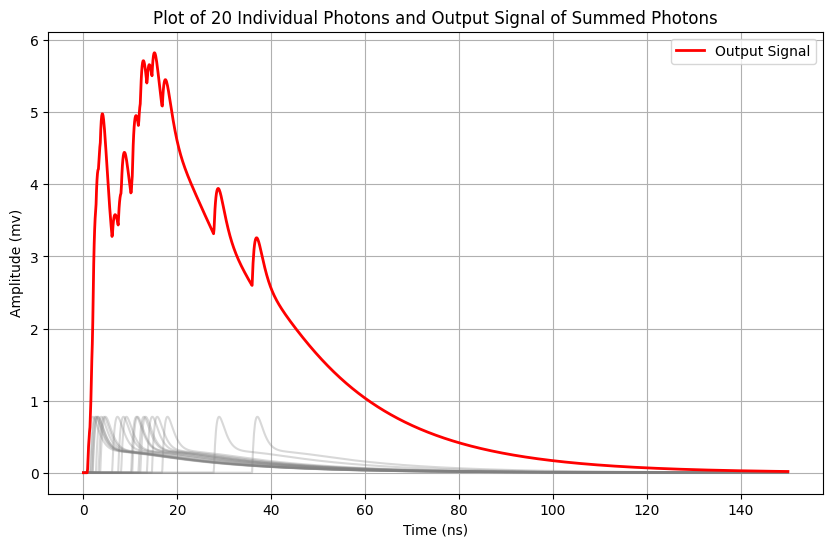

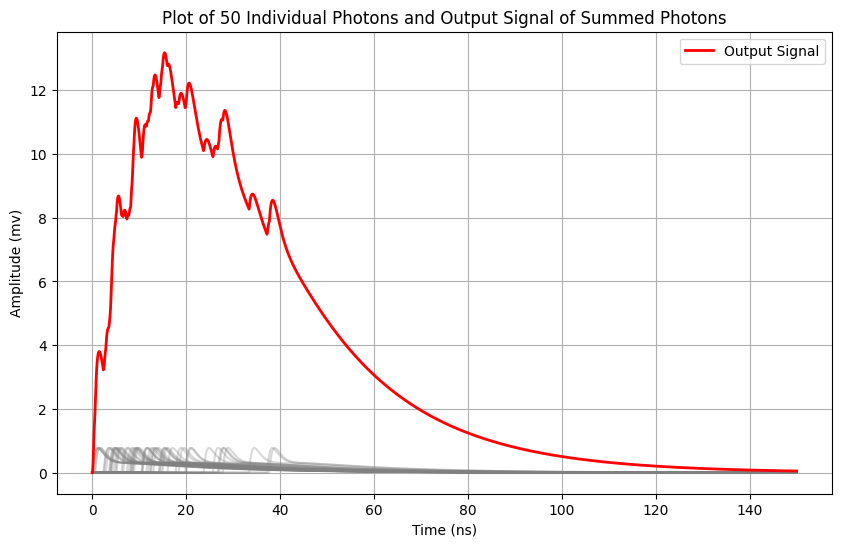

In [9]:
# Generate and export data for different numbers of photons
photons_list = [2, 4, 6, 10, 20, 50]  # Example numbers of photons
for n in photons_list:
    simulate_photon_data(n)
